In [1]:
#sklearn 1.1.0버전으로 재설치
#!pip uninstall sklearn
#!pip install --upgrade sklearn
#!pip install scikit-learn==1.1.0 --user

#버전 확인(커널 닫았다가 열기)
#import sklearn
#sklearn.__version__

#오버샘플링
#!pip install imblearn

#lgbm
#!pip install lightgbm

In [1]:
# 나눔폰트 설치, 해당 셀 실행 후 런타임 다시 시작
#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

## 데이터 불러오기, 개요 확인

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score

%matplotlib inline

In [2]:
#코랩용
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#코랩용
#food = pd.read_csv("/content/drive/MyDrive/bigdata/분식 생존.csv", encoding='cp949')

In [4]:
#주피터용
food = pd.read_csv('분식 생존.csv', encoding='cp949') #csv 불러오기   

In [5]:
food.head() #csv 5행만 보기

,영업상태구분코드,사업장명,소재지면적,교통 수,집객시설 수,교육 수,경쟁자 수,인허가 영업,인허가 폐업,인허가 영업+폐업,...,아파트 세대수,제곱미터 당 임대료,임대료,총생활인구수,점심저녁시간대 생활인구수,골목상권,발달상권,구분불가,전통시장,관광특구
0,1,스시에이,13,93,8,153,139,537,671,1208,...,9146,30987.5555,409,11670.19361,10936.29824,1,0,0,0,0
1,1,떡볶이앤튀김,18,77,7,153,104,376,468,844,...,10273,30987.5555,565,11670.19361,10936.29824,1,0,0,0,0
2,1,들깨 칼국수,27,88,8,151,139,541,690,1231,...,8886,30987.5555,842,11670.19361,10936.29824,1,0,0,0,0
3,1,명토종순대국,32,88,7,166,131,491,616,1107,...,11259,30987.5555,989,11670.19361,10936.29824,1,0,0,0,0
4,1,끼니와참,50,29,2,61,52,216,299,515,...,3080,30987.5555,1551,10147.43217,10163.56076,1,0,0,0,0


In [6]:
food.info() #데이터 개요 확인 (열이름, 개수,데이터유형)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3658 entries, 0 to 3657
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   영업상태구분코드       3658 non-null   int64  
 1   사업장명           3658 non-null   object 
 2   소재지면적          3658 non-null   int64  
 3   교통 수           3658 non-null   int64  
 4   집객시설 수         3658 non-null   int64  
 5   교육 수           3658 non-null   int64  
 6   경쟁자 수          3658 non-null   int64  
 7   인허가 영업         3658 non-null   int64  
 8   인허가 폐업         3658 non-null   int64  
 9   인허가 영업+폐업      3658 non-null   int64  
 10  타업종비율          3658 non-null   float64
 11  타업종경쟁자         3658 non-null   int64  
 12  버퍼내폐업비율        3658 non-null   float64
 13  영업기간           3658 non-null   int64  
 14  생존여부           3658 non-null   int64  
 15  아파트 세대수        3658 non-null   int64  
 16  제곱미터 당 임대료     3658 non-null   float64
 17  임대료            3658 non-null   int64  
 18  총생활인구수  

## 결측치 확인 및 전처리

In [30]:
#문자형 변수 확인
object_columns = food.columns[food.dtypes == 'object']
print('object 칼럼은 다음과 같습니다 : ', list(object_columns))

# 해당 칼럼만 확인
food[object_columns]

object 칼럼은 다음과 같습니다 :  ['사업장명']


,사업장명
0,스시에이
1,떡볶이앤튀김
2,들깨 칼국수
3,명토종순대국
4,끼니와참
...,...
3653,김밥천국
3654,천상만인
3655,머슴포차
3656,밥테이블


In [31]:
#필요없는 문자형 변수 제외
feature1columns =list(food.columns.difference(food[object_columns].columns)) 
food=food[feature1columns]

In [8]:
food

,영업상태구분코드,사업장명,소재지면적,교통 수,집객시설 수,교육 수,경쟁자 수,인허가 영업,인허가 폐업,인허가 영업+폐업,...,아파트 세대수,제곱미터 당 임대료,임대료,총생활인구수,점심저녁시간대 생활인구수,골목상권,발달상권,구분불가,전통시장,관광특구
0,1,스시에이,13,93,8,153,139,537,671,1208,...,9146,30987.55550,409,11670.19361,10936.29824,1,0,0,0,0
1,1,떡볶이앤튀김,18,77,7,153,104,376,468,844,...,10273,30987.55550,565,11670.19361,10936.29824,1,0,0,0,0
2,1,들깨 칼국수,27,88,8,151,139,541,690,1231,...,8886,30987.55550,842,11670.19361,10936.29824,1,0,0,0,0
3,1,명토종순대국,32,88,7,166,131,491,616,1107,...,11259,30987.55550,989,11670.19361,10936.29824,1,0,0,0,0
4,1,끼니와참,50,29,2,61,52,216,299,515,...,3080,30987.55550,1551,10147.43217,10163.56076,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3653,1,김밥천국,14,70,9,300,154,550,605,1155,...,12062,31748.43375,446,55951.10631,55277.92730,0,0,1,0,0
3654,1,천상만인,33,90,18,186,279,1291,1431,2722,...,6950,30875.16667,1019,55951.10631,55277.92730,0,0,1,0,0
3655,1,머슴포차,67,67,9,202,173,783,795,1578,...,8471,29924.51000,2015,55951.10631,55277.92730,0,0,1,0,0
3656,1,밥테이블,62,90,18,186,279,1291,1431,2722,...,6950,30875.16667,1907,55951.10631,55277.92730,0,0,1,0,0


In [9]:
#추가로 필요없는 변수 제외
feature2columns =list(food.columns.difference(food[["영업기간", "제곱미터 당 임대료", "영업상태구분코드"]].columns)) 
food=food[feature2columns]

In [10]:
food

,경쟁자 수,골목상권,관광특구,교육 수,교통 수,구분불가,발달상권,버퍼내폐업비율,사업장명,생존여부,...,인허가 영업,인허가 영업+폐업,인허가 폐업,임대료,전통시장,점심저녁시간대 생활인구수,집객시설 수,총생활인구수,타업종경쟁자,타업종비율
0,139,1,0,153,93,0,0,0.555464,스시에이,0,...,537,1208,671,409,0,10936.29824,8,11670.19361,1069,0.884934
1,104,1,0,153,77,0,0,0.554502,떡볶이앤튀김,0,...,376,844,468,565,0,10936.29824,7,11670.19361,740,0.876777
2,139,1,0,151,88,0,0,0.560520,들깨 칼국수,0,...,541,1231,690,842,0,10936.29824,8,11670.19361,1092,0.887084
3,131,1,0,166,88,0,0,0.556459,명토종순대국,1,...,491,1107,616,989,0,10936.29824,7,11670.19361,976,0.881662
4,52,1,0,61,29,0,0,0.580583,끼니와참,0,...,216,515,299,1551,0,10163.56076,2,10147.43217,463,0.899029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3653,154,0,0,300,70,1,0,0.523810,김밥천국,0,...,550,1155,605,446,0,55277.92730,9,55951.10631,1001,0.866667
3654,279,0,0,186,90,1,0,0.525716,천상만인,0,...,1291,2722,1431,1019,0,55277.92730,18,55951.10631,2443,0.897502
3655,173,0,0,202,67,1,0,0.503802,머슴포차,0,...,783,1578,795,2015,0,55277.92730,9,55951.10631,1405,0.890368
3656,279,0,0,186,90,1,0,0.525716,밥테이블,0,...,1291,2722,1431,1907,0,55277.92730,18,55951.10631,2443,0.897502


In [11]:
#출처 : https://dacon.io/competitions/official/235959/codeshare/5934?page&dtype&ptype&fType
# 먼저 결측치가 얼마나 있는지 확인
# csv형태에서 먼저 결측치있는 행을 제거하여 null값이 없음

food.isna().sum()

경쟁자 수            0
골목상권             0
관광특구             0
교육 수             0
교통 수             0
구분불가             0
발달상권             0
버퍼내폐업비율          0
사업장명             0
생존여부             0
소재지면적            0
아파트 세대수          0
인허가 영업           0
인허가 영업+폐업        0
인허가 폐업           0
임대료              0
전통시장             0
점심저녁시간대 생활인구수    0
집객시설 수           0
총생활인구수           0
타업종경쟁자           0
타업종비율            0
dtype: int64

## EDA

In [12]:
#데이터의 통계적인 개요 확인
food.describe(include="all") 

,경쟁자 수,골목상권,관광특구,교육 수,교통 수,구분불가,발달상권,버퍼내폐업비율,사업장명,생존여부,...,인허가 영업,인허가 영업+폐업,인허가 폐업,임대료,전통시장,점심저녁시간대 생활인구수,집객시설 수,총생활인구수,타업종경쟁자,타업종비율
count,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658,3658.000000,...,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3372,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,김밥천국,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,170.957354,0.316840,0.000273,219.026244,83.845544,0.478950,0.168945,0.493675,NaN,0.152542,...,811.699836,1608.626299,796.926463,1320.042100,0.034992,31536.906436,21.975670,30223.751120,1437.668945,0.888204
std,88.206211,0.465308,0.016534,193.304096,26.720685,0.499625,0.374754,0.057729,NaN,0.359595,...,459.796992,914.062793,474.783037,1191.872621,0.183784,20036.669105,39.694729,15991.273833,835.030043,0.027197
min,2.000000,0.000000,0.000000,2.000000,7.000000,0.000000,0.000000,0.303483,NaN,0.000000,...,9.000000,28.000000,19.000000,92.000000,0.000000,3443.532098,0.000000,2960.416900,21.000000,0.750000
25%,107.000000,0.000000,0.000000,110.000000,64.000000,0.000000,0.000000,0.468414,NaN,0.000000,...,490.000000,997.000000,487.250000,673.000000,0.000000,18597.212010,7.000000,19288.244250,868.250000,0.873523
50%,154.000000,0.000000,0.000000,167.000000,83.000000,0.000000,0.000000,0.503286,NaN,0.000000,...,726.000000,1411.000000,695.000000,986.000000,0.000000,25758.711480,12.000000,26179.793200,1258.000000,0.890076
75%,222.000000,1.000000,0.000000,269.000000,102.000000,1.000000,0.000000,0.532514,NaN,0.000000,...,1018.000000,1972.000000,976.750000,1536.750000,0.000000,37988.806250,18.000000,38413.051400,1759.500000,0.906051


In [14]:
#한글 폰트 지정 - 주피터용
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.family'] = 'Maigun Gothic'

In [13]:
#한글 폰트 지정 - 코랩용
#plt.rc('font', family='NanumBarunGothic') 

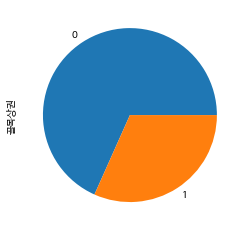

In [14]:
#범주형 데이터 확인
food['골목상권'].value_counts().plot(kind="pie") 

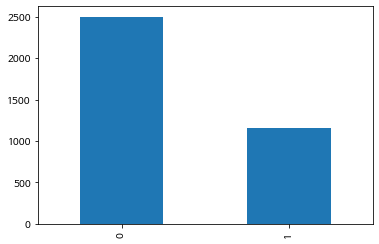

In [15]:
#범주형 데이터 확인
food['골목상권'].value_counts().plot(kind="bar") 

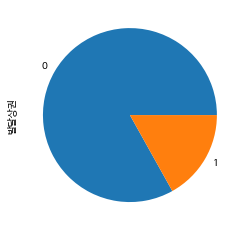

In [16]:
#범주형 데이터 확인
food['발달상권'].value_counts().plot(kind="pie") 

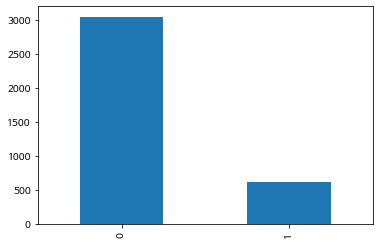

In [17]:
#범주형 데이터 확인
food['발달상권'].value_counts().plot(kind="bar") 

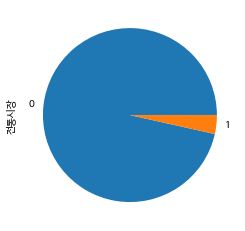

In [18]:
#범주형 데이터 확인
food['전통시장'].value_counts().plot(kind="pie") 

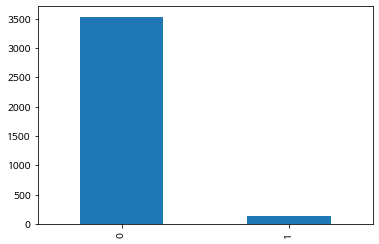

In [19]:
#범주형 데이터 확인
food['전통시장'].value_counts().plot(kind="bar") 

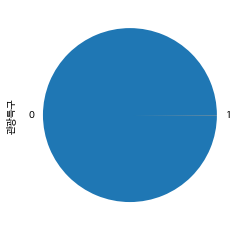

In [20]:
#범주형 데이터 확인
food['관광특구'].value_counts().plot(kind="pie")

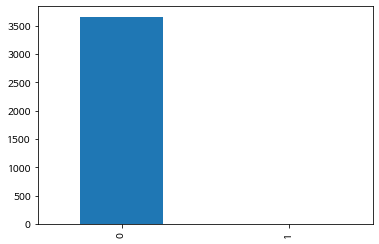

In [21]:
#범주형 데이터 확인
food['관광특구'].value_counts().plot(kind="bar")

In [22]:
#범주형 taget 데이터 확인
food['생존여부'].value_counts() 

0    3100
1     558
Name: 생존여부, dtype: int64

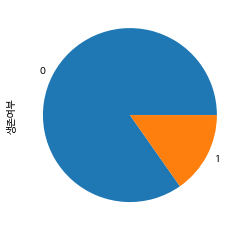

In [23]:
#원그래프로 범주형 target 데이터 확인
food['생존여부'].value_counts().plot(kind="pie")  

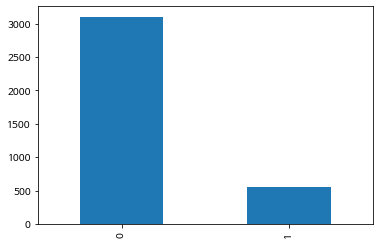

In [24]:
#막대그래프로 범주형 target 데이터 확인, 폐업이 더 많이 차지, 데이터 불균형
food['생존여부'].value_counts().plot(kind="bar") 

In [25]:
#열 이름 확인
food.columns 

Index(['경쟁자 수', '골목상권', '관광특구', '교육 수', '교통 수', '구분불가', '발달상권', '버퍼내폐업비율',
       '사업장명', '생존여부', '소재지면적', '아파트 세대수', '인허가 영업', '인허가 영업+폐업', '인허가 폐업',
       '임대료', '전통시장', '점심저녁시간대 생활인구수', '집객시설 수', '총생활인구수', '타업종경쟁자', '타업종비율'],
      dtype='object')

In [26]:
#연속형 변수 기초통계량 확인
food[["교통 수","집객시설 수","교육 수","경쟁자 수","인허가 영업","인허가 폐업","인허가 영업+폐업"]].describe()
# 교통 수 제외 모두 이상치 많이 있을 것으로 예상 (mean, min, max 분산 확인 결과)

,교통 수,집객시설 수,교육 수,경쟁자 수,인허가 영업,인허가 폐업,인허가 영업+폐업
count,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000
mean,83.845544,21.975670,219.026244,170.957354,811.699836,796.926463,1608.626299
std,26.720685,39.694729,193.304096,88.206211,459.796992,474.783037,914.062793
min,7.000000,0.000000,2.000000,2.000000,9.000000,19.000000,28.000000
25%,64.000000,7.000000,110.000000,107.000000,490.000000,487.250000,997.000000
50%,83.000000,12.000000,167.000000,154.000000,726.000000,695.000000,1411.000000
75%,102.000000,18.000000,269.000000,222.000000,1018.000000,976.750000,1972.000000
max,174.000000,324.000000,1656.000000,467.000000,2596.000000,2766.000000,5021.000000


In [27]:
#연속형 변수 기초통계량 확인
food[["타업종비율","타업종경쟁자","버퍼내폐업비율","아파트 세대수","임대료","총생활인구수",
      "점심저녁시간대 생활인구수"]].describe()
#타업종비율, 버퍼내폐업비율 제외 모두 이상치 많이 있을 것으로 예상(mean, min, max, 분산 확인결과)

,타업종비율,타업종경쟁자,버퍼내폐업비율,아파트 세대수,임대료,총생활인구수,점심저녁시간대 생활인구수
count,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000
mean,0.888204,1437.668945,0.493675,10269.369874,1320.042100,30223.751120,31536.906436
std,0.027197,835.030043,0.057729,6982.566426,1191.872621,15991.273833,20036.669105
min,0.750000,21.000000,0.303483,0.000000,92.000000,2960.416900,3443.532098
25%,0.873523,868.250000,0.468414,4947.000000,673.000000,19288.244250,18597.212010
50%,0.890076,1258.000000,0.503286,8807.500000,986.000000,26179.793200,25758.711480
75%,0.906051,1759.500000,0.532514,14154.000000,1536.750000,38413.051400,37988.806250
max,0.974026,4628.000000,0.678571,38817.000000,18940.000000,108753.472800,134994.908800


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

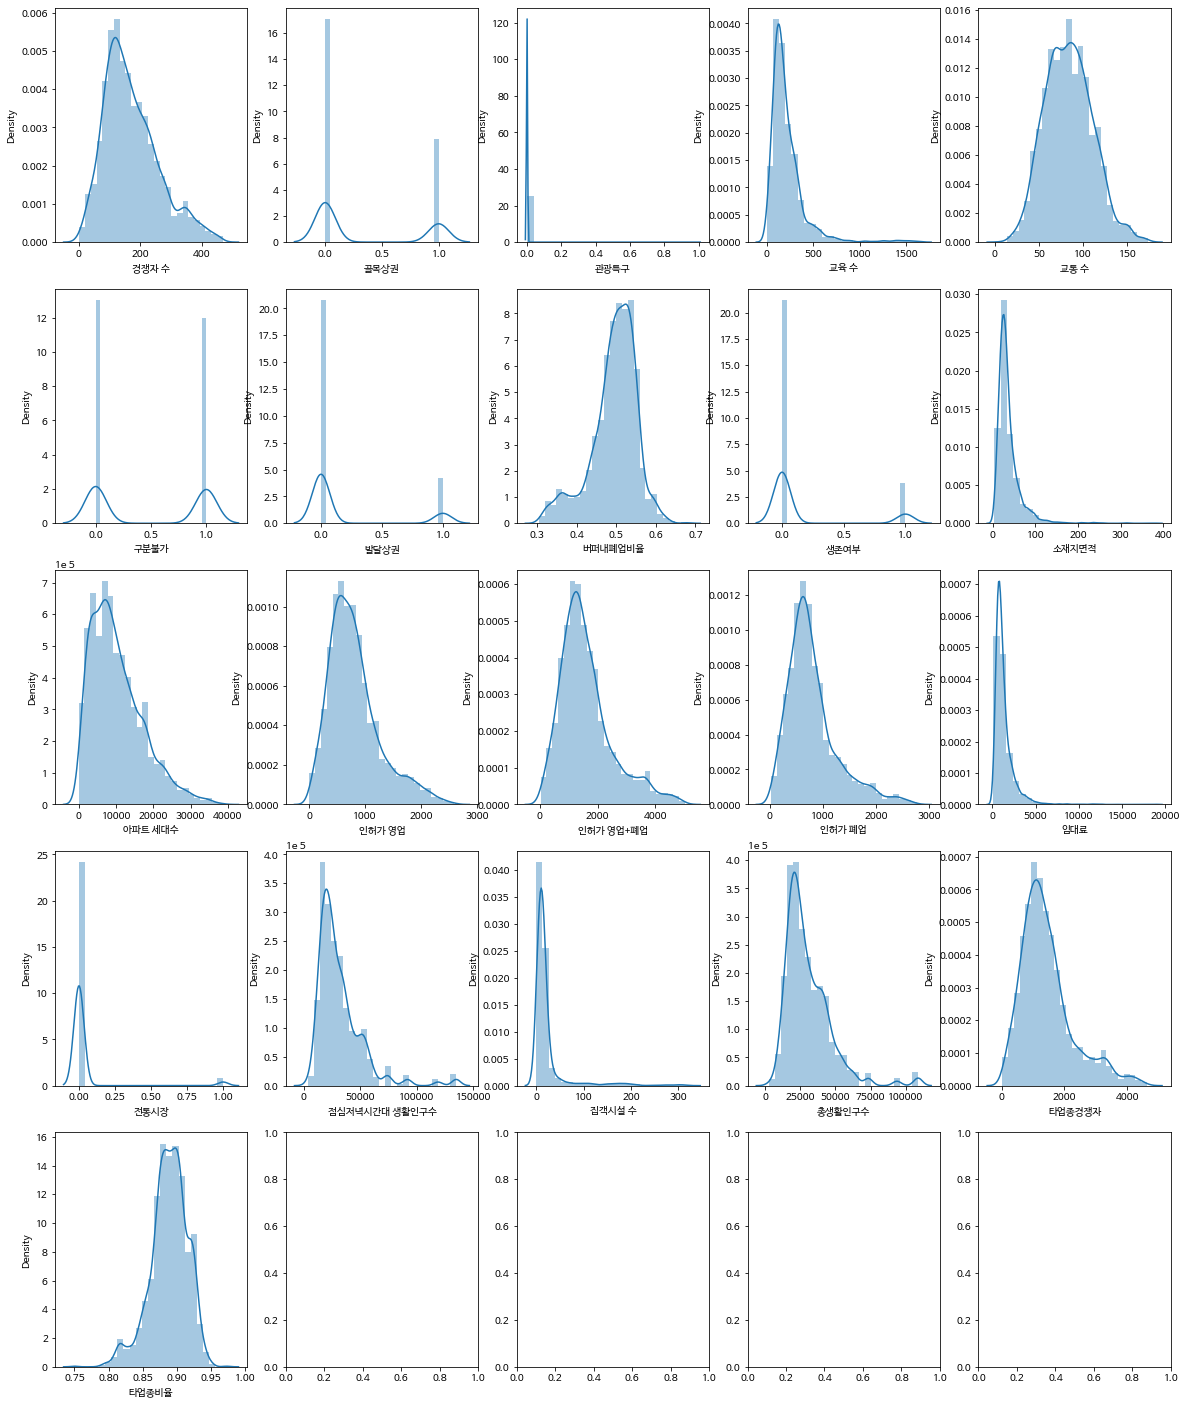

In [32]:
#전체 히스토그램그려보기
col_n = 5
row_n = 5

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))

for i,col in enumerate(food.columns):
    sns.distplot(food[col], bins=25, ax=ax[int(i/col_n),int(i%col_n)])
#출처: https://csshark.tistory.com/56 [컴퓨터하는 상어:티스토리] 

In [33]:
#왜도 첨도 확인
for col in food:
    print('{:15}'.format(col), 
          'Skewness: {:05.2f}'.format(food[col].skew()) , 
          '   ' ,
          'Kurtosis: {:06.2f}'.format(food[col].kurt())  
         ) 
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리]
#log변환 필요한 변수(왜도가 -1~1 밖의 값) : 교육수, 소재지면적, 인허가 영업, 인허가 영업+폐업, 인허가 폐업, 임대료, 점심저녁시간대 생활인구수, 집객시설 수, 총생활인구수, 타업종경쟁자

경쟁자 수           Skewness: 00.81     Kurtosis: 000.34
골목상권            Skewness: 00.79     Kurtosis: -01.38
관광특구            Skewness: 60.48     Kurtosis: 3658.00
교육 수            Skewness: 03.47     Kurtosis: 017.28
교통 수            Skewness: 00.27     Kurtosis: -00.10
구분불가            Skewness: 00.08     Kurtosis: -01.99
발달상권            Skewness: 01.77     Kurtosis: 001.13
버퍼내폐업비율         Skewness: -0.88     Kurtosis: 000.93
생존여부            Skewness: 01.93     Kurtosis: 001.74
소재지면적           Skewness: 04.05     Kurtosis: 028.73
아파트 세대수         Skewness: 00.99     Kurtosis: 000.80
인허가 영업          Skewness: 01.08     Kurtosis: 001.12
인허가 영업+폐업       Skewness: 01.15     Kurtosis: 001.30
인허가 폐업          Skewness: 01.32     Kurtosis: 001.95
임대료             Skewness: 04.50     Kurtosis: 035.72
전통시장            Skewness: 05.06     Kurtosis: 023.65
점심저녁시간대 생활인구수   Skewness: 02.41     Kurtosis: 008.25
집객시설 수          Skewness: 04.50     Kurtosis: 022.50
총생활인구수          Skewness: 01.94     Kurtosis:

## 정규화(로그변환 및 로버스트 스케일링)

In [34]:
#스케일링 방법 결정
#출처 - https://soo-jjeong.tistory.com/122
Afood1=food.copy()
Arob = Afood1[Afood1.columns.difference(['교육 수', '소재지면적', '인허가 영업', '인허가 영업+폐업', '인허가 폐업', '임대료', '점심저녁시간대 생활인구수', '집객시설 수', '총생활인구수', '타업종경쟁자',
                                        '골목상권','관광특구','구분불가','발달상권','전통시장','생존여부'])] #로버스트스케일링할 데이터
Adis =Afood1[['골목상권','관광특구','구분불가','발달상권','전통시장','생존여부']] #범주형 변수 데이터
Alog =Afood1[['교육 수', '소재지면적', '인허가 영업', '인허가 영업+폐업', '인허가 폐업', '임대료', '점심저녁시간대 생활인구수', '집객시설 수', '총생활인구수', '타업종경쟁자']] #log변환 데이터

In [35]:
#log변환할 데이터
Alog.head()

,교육 수,소재지면적,인허가 영업,인허가 영업+폐업,인허가 폐업,임대료,점심저녁시간대 생활인구수,집객시설 수,총생활인구수,타업종경쟁자
0,153,13,537,1208,671,409,10936.29824,8,11670.19361,1069
1,153,18,376,844,468,565,10936.29824,7,11670.19361,740
2,151,27,541,1231,690,842,10936.29824,8,11670.19361,1092
3,166,32,491,1107,616,989,10936.29824,7,11670.19361,976
4,61,50,216,515,299,1551,10163.56076,2,10147.43217,463


In [36]:
#범주형 변수 데이터
Adis.head()

,골목상권,관광특구,구분불가,발달상권,전통시장,생존여부
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,1
4,1,0,0,0,0,0


In [37]:
#로버스트 스케일링할 데이터
Arob.head()

,경쟁자 수,교통 수,버퍼내폐업비율,아파트 세대수,타업종비율
0,139,93,0.555464,9146,0.884934
1,104,77,0.554502,10273,0.876777
2,139,88,0.560520,8886,0.887084
3,131,88,0.556459,11259,0.881662
4,52,29,0.580583,3080,0.899029


In [38]:
#로그변환할 열 이름
Alog.columns 

Index(['교육 수', '소재지면적', '인허가 영업', '인허가 영업+폐업', '인허가 폐업', '임대료',
       '점심저녁시간대 생활인구수', '집객시설 수', '총생활인구수', '타업종경쟁자'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: -0.319
Kurtosis: 1.668


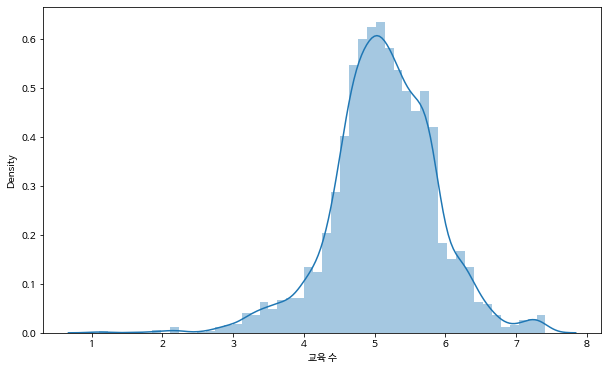

In [39]:
#교육 수 열 로그 변환 후 히스토그램
Alog["교육 수"] = np.log1p(Alog["교육 수"])
f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(Alog["교육 수"])

print("Skewness: {:.3f}".format(Alog["교육 수"].skew()))
print("Kurtosis: {:.3f}".format(Alog["교육 수"].kurt()))
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리] #확정

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 0.286
Kurtosis: 0.862


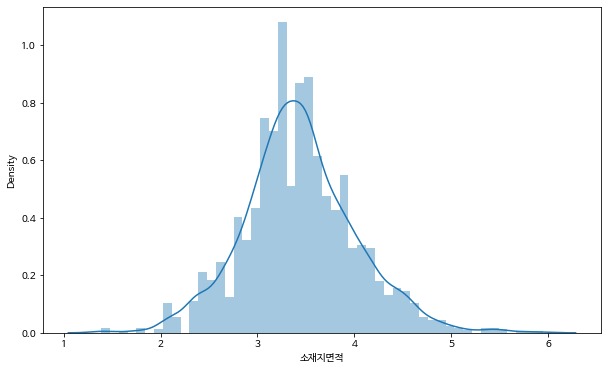

In [40]:
#소재지면적 열 로그 변환 후 히스토그램
Alog["소재지면적"] = np.log1p(Alog["소재지면적"])

f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(Alog["소재지면적"])

print("Skewness: {:.3f}".format(Alog["소재지면적"].skew()))
print("Kurtosis: {:.3f}".format(Alog["소재지면적"].kurt()))
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리] #확정

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: -1.058
Kurtosis: 3.191


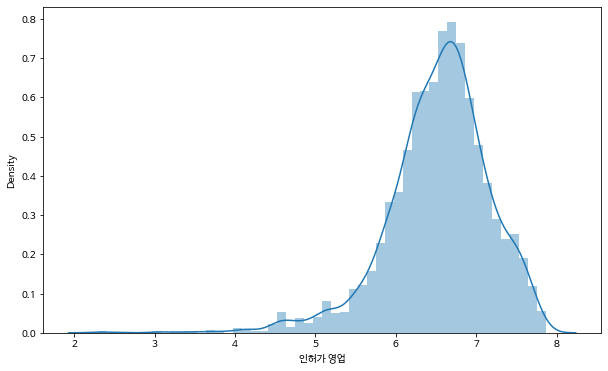

In [41]:
#인허가 영업 열 로그 변환 후 히스토그램
Alog["인허가 영업"] = np.log1p(Alog["인허가 영업"])

f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(Alog["인허가 영업"])

print("Skewness: {:.3f}".format(Alog["인허가 영업"].skew()))
print("Kurtosis: {:.3f}".format(Alog["인허가 영업"].kurt()))
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리] #확정

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: -1.003
Kurtosis: 2.936


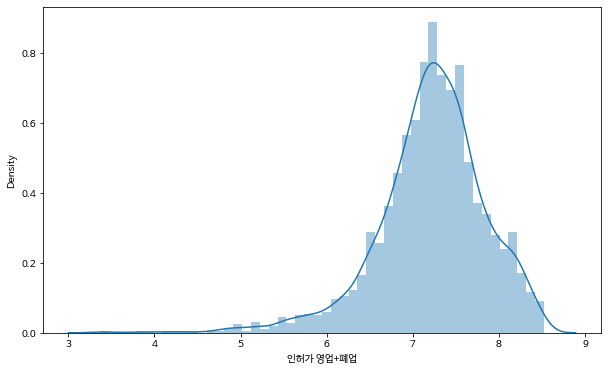

In [42]:
#인허가 영업+페업 열 로그 변환 후 히스토그램
Alog["인허가 영업+폐업"] = np.log1p(Alog["인허가 영업+폐업"])

f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(Alog["인허가 영업+폐업"])

print("Skewness: {:.3f}".format(Alog["인허가 영업+폐업"].skew()))
print("Kurtosis: {:.3f}".format(Alog["인허가 영업+폐업"].kurt()))
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리] #확정

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: -0.903
Kurtosis: 2.452


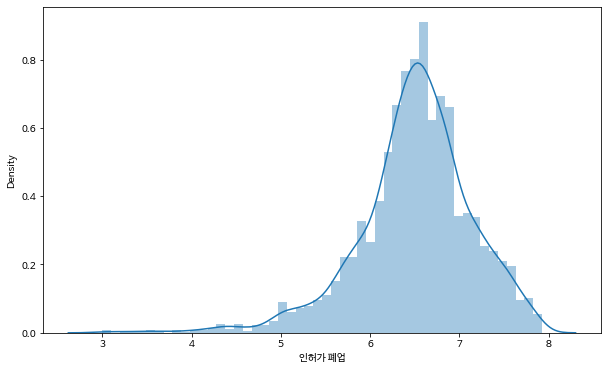

In [43]:
#인허가 폐업 열 로그 변환 후 히스토그램
Alog["인허가 폐업"] = np.log1p(Alog["인허가 폐업"])

f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(Alog["인허가 폐업"])

print("Skewness: {:.3f}".format(Alog["인허가 폐업"].skew()))
print("Kurtosis: {:.3f}".format(Alog["인허가 폐업"].kurt()))
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리] #확정

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 0.301
Kurtosis: 0.643


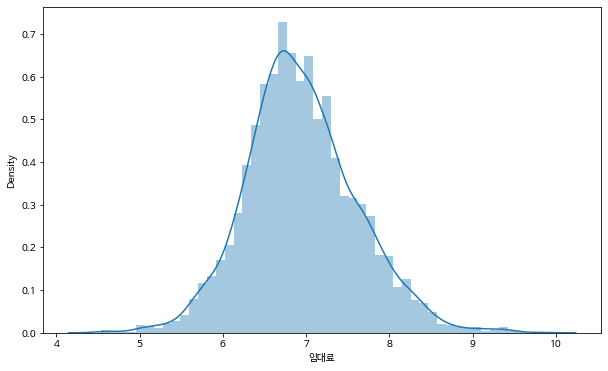

In [44]:
#임대료 열 로그 변환 후 히스토그램
Alog["임대료"] = np.log1p(Alog["임대료"])

f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(Alog["임대료"])

print("Skewness: {:.3f}".format(Alog["임대료"].skew()))
print("Kurtosis: {:.3f}".format(Alog["임대료"].kurt()))
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리] #확정

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 0.248
Kurtosis: 0.520


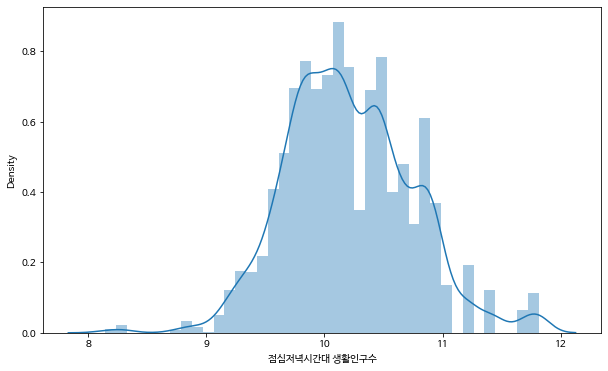

In [45]:
#점심저녁시간대 생활인구수 열 로그 변환 후 히스토그램
Alog['점심저녁시간대 생활인구수'] = np.log1p(Alog['점심저녁시간대 생활인구수'])

f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(Alog['점심저녁시간대 생활인구수'])

print("Skewness: {:.3f}".format(Alog['점심저녁시간대 생활인구수'].skew()))
print("Kurtosis: {:.3f}".format(Alog['점심저녁시간대 생활인구수'].kurt()))
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리] #확정

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 1.032
Kurtosis: 2.450


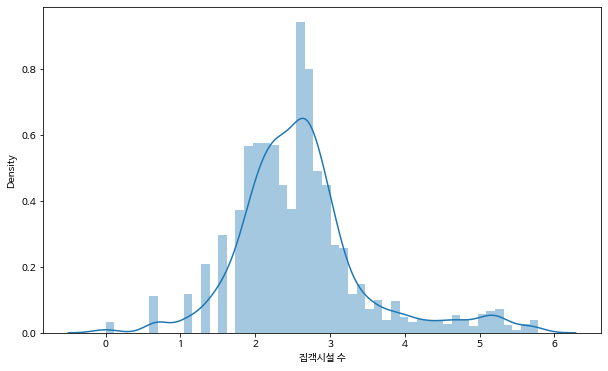

In [46]:
#집객시설 수 열 로그 변환 후 히스토그램
Alog['집객시설 수'] = np.log1p(Alog['집객시설 수'])

f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(Alog['집객시설 수'])

print("Skewness: {:.3f}".format(Alog['집객시설 수'].skew()))
print("Kurtosis: {:.3f}".format(Alog['집객시설 수'].kurt()))
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리] #확정

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 0.018
Kurtosis: 0.736


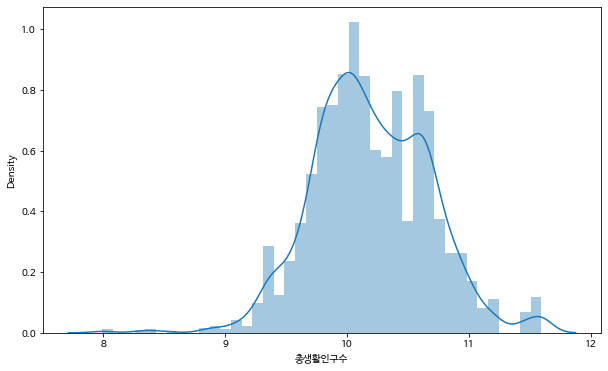

In [47]:
#총생활인구수 열 로그 변환 후 히스토그램
Alog['총생활인구수'] = np.log1p(Alog['총생활인구수'])

f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(Alog['총생활인구수'])

print("Skewness: {:.3f}".format(Alog['총생활인구수'].skew()))
print("Kurtosis: {:.3f}".format(Alog['총생활인구수'].kurt()))
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리] #확정

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: -1.000
Kurtosis: 2.954


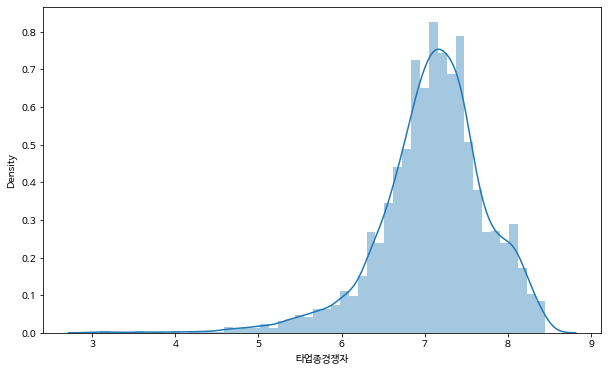

In [48]:
#타업종경쟁자 열 로그 변환 후 히스토그램
Alog['타업종경쟁자'] = np.log1p(Alog['타업종경쟁자'])

f, ax = plt.subplots(figsize = (10, 6))

sns.distplot(Alog['타업종경쟁자'])

print("Skewness: {:.3f}".format(Alog['타업종경쟁자'].skew()))
print("Kurtosis: {:.3f}".format(Alog['타업종경쟁자'].kurt()))
#출처: https://hong-yp-ml-records.tistory.com/28 [HONG YP's Data Science BLOG:티스토리] #확정

In [49]:
#log변환 결과
Alog.head() 

,교육 수,소재지면적,인허가 영업,인허가 영업+폐업,인허가 폐업,임대료,점심저녁시간대 생활인구수,집객시설 수,총생활인구수,타업종경쟁자
0,5.036953,2.639057,6.287859,7.097549,6.510258,6.016157,9.299934,2.197225,9.364879,6.975414
1,5.036953,2.944439,5.932245,6.739337,6.150603,6.338594,9.299934,2.079442,9.364879,6.608001
2,5.023881,3.332205,6.295266,7.116394,6.538140,6.736967,9.299934,2.197225,9.364879,6.996681
3,5.117994,3.496508,6.198479,7.010312,6.424869,6.897705,9.299934,2.079442,9.364879,6.884487
4,4.127134,3.931826,5.379897,6.246107,5.703782,7.347300,9.226663,1.098612,9.225075,6.139885


In [50]:
#로버스트 스케일링
scaler = RobustScaler() 
df_robust = scaler.fit_transform(Arob)

In [51]:
#스케일링값 데이터프레임화
robust = pd.DataFrame(df_robust, columns =Arob.columns)  

In [52]:
#결과값 확인
robust 

,경쟁자 수,교통 수,버퍼내폐업비율,아파트 세대수,타업종비율
0,-0.130435,0.263158,0.814006,0.036766,-0.158083
1,-0.434783,-0.157895,0.799010,0.159172,-0.408836
2,-0.130435,0.131579,0.892888,0.008526,-0.091989
3,-0.200000,0.131579,0.829533,0.266265,-0.258661
4,-0.886957,-1.421053,1.205881,-0.622081,0.275246
...,...,...,...,...,...
3653,0.000000,-0.342105,0.320177,0.353481,-0.719663
3654,1.086957,0.184211,0.349926,-0.201749,0.228293
3655,0.165217,-0.421053,0.008048,-0.036548,0.008966
3656,1.086957,0.184211,0.349926,-0.201749,0.228293


In [53]:
#연속형 변수끼리 합치기
robust[['교육 수', '소재지면적', '인허가 영업', '인허가 영업+폐업', '인허가 폐업', '임대료',
       '점심저녁시간대 생활인구수', '집객시설 수', '총생활인구수', '타업종경쟁자']]=Alog 

In [54]:
robust

,경쟁자 수,교통 수,버퍼내폐업비율,아파트 세대수,타업종비율,교육 수,소재지면적,인허가 영업,인허가 영업+폐업,인허가 폐업,임대료,점심저녁시간대 생활인구수,집객시설 수,총생활인구수,타업종경쟁자
0,-0.130435,0.263158,0.814006,0.036766,-0.158083,5.036953,2.639057,6.287859,7.097549,6.510258,6.016157,9.299934,2.197225,9.364879,6.975414
1,-0.434783,-0.157895,0.799010,0.159172,-0.408836,5.036953,2.944439,5.932245,6.739337,6.150603,6.338594,9.299934,2.079442,9.364879,6.608001
2,-0.130435,0.131579,0.892888,0.008526,-0.091989,5.023881,3.332205,6.295266,7.116394,6.538140,6.736967,9.299934,2.197225,9.364879,6.996681
3,-0.200000,0.131579,0.829533,0.266265,-0.258661,5.117994,3.496508,6.198479,7.010312,6.424869,6.897705,9.299934,2.079442,9.364879,6.884487
4,-0.886957,-1.421053,1.205881,-0.622081,0.275246,4.127134,3.931826,5.379897,6.246107,5.703782,7.347300,9.226663,1.098612,9.225075,6.139885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3653,0.000000,-0.342105,0.320177,0.353481,-0.719663,5.707110,2.708050,6.311735,7.052721,6.406880,6.102559,10.920147,2.302585,10.932251,6.909753
3654,1.086957,0.184211,0.349926,-0.201749,0.228293,5.231109,3.526361,7.163947,7.909489,7.266827,6.927558,10.920147,2.944439,10.932251,7.801391
3655,0.165217,-0.421053,0.008048,-0.036548,0.008966,5.313206,4.219508,6.664409,7.364547,6.679599,7.608871,10.920147,2.302585,10.932251,7.248504
3656,1.086957,0.184211,0.349926,-0.201749,0.228293,5.231109,4.143135,7.163947,7.909489,7.266827,7.553811,10.920147,2.944439,10.932251,7.801391


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

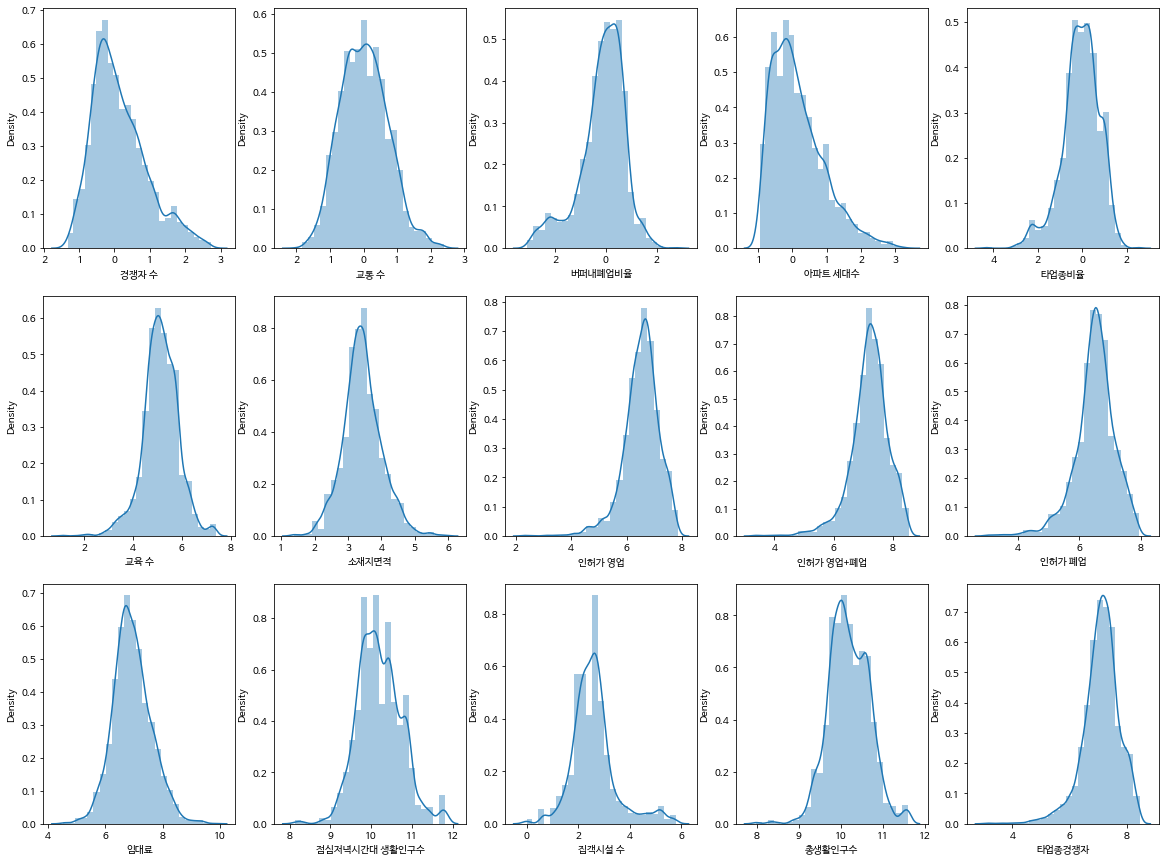

In [55]:
#연속형 변수 전체 히스토그램 그리기
col_n = 5
row_n = 3

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))
for i,col in enumerate(robust.columns):
    sns.distplot(robust[col], bins=25, ax=ax[int(i/col_n),int(i%col_n)])  
#출처: https://csshark.tistory.com/56 [컴퓨터하는 상어:티스토리] 

## 다중공선성 확인

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

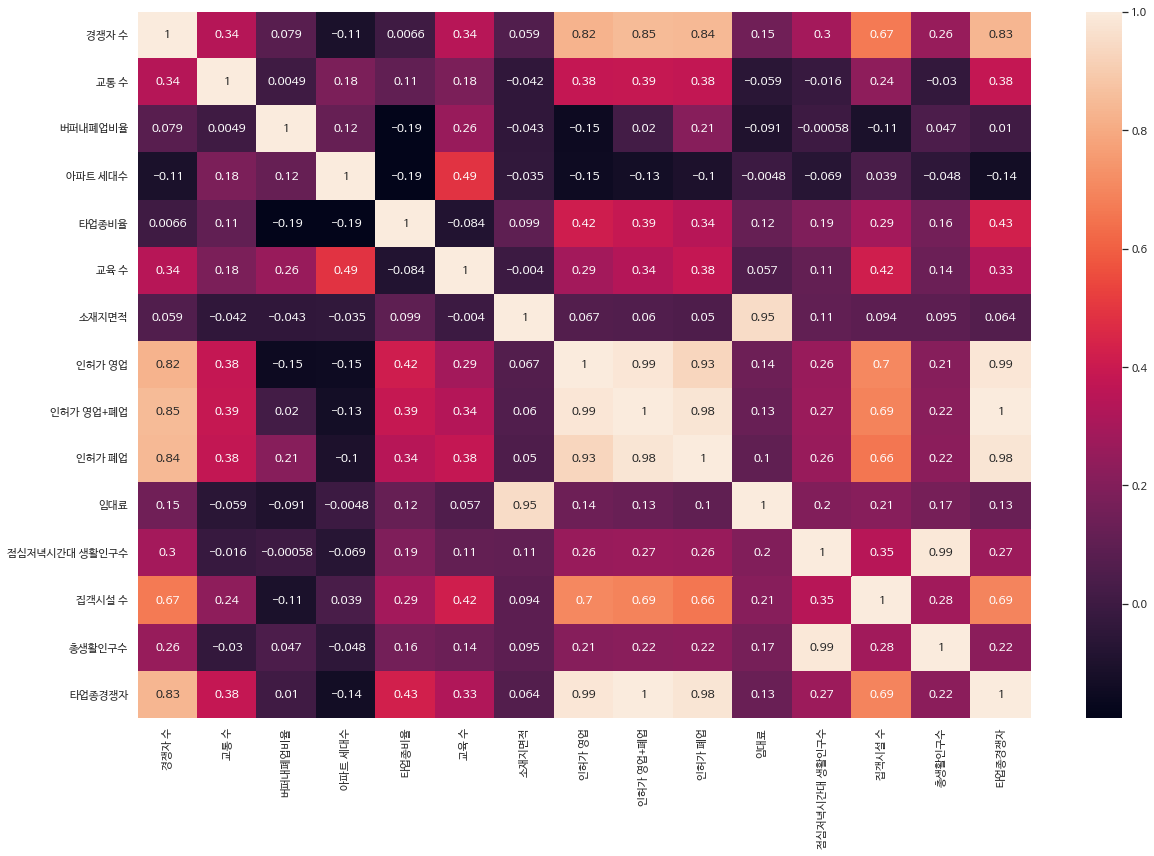

In [56]:
# #히트맵그리기-코랩용
# #annot = True으로 상관계수값나오게함, 양일수록 밝게, 음일수록 어둡게
# #annot = True으로 상관계수값나오게함, 양일수록 밝게, 음일수록 어둡게
# plt.rc("font", family = "NanumBarunGothic")
# sns.set(rc = {'figure.figsize':(20,13),"axes.unicode_minus":False},font="NanumBarunGothic", style='white')
# sns.heatmap(robust.corr(), annot = True) 
# plt.show()

In [ ]:
#히트맵그리기-주피터용
#annot = True으로 상관계수값나오게함, 양일수록 밝게, 음일수록 어둡게
#annot = True으로 상관계수값나오게함, 양일수록 밝게, 음일수록 어둡게
plt.rc("font", family = "NanumBarunGothic")
sns.set(rc = {'figure.figsize':(20,13),"axes.unicode_minus":False},font="Maigun Gothic", style='white')
sns.heatmap(robust.corr(), annot = True) 
plt.show()

In [60]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#변수 별 vif 확인 
vif=pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(robust.values, i) for i in range(robust.shape[1])] #x_data.shape[1]는 변수를 뜻함
vif['features'] = robust.columns
vif

,VIF Factor,features
0,8.836368e+00,경쟁자 수
1,1.359638e+00,교통 수
2,1.136987e+04,버퍼내폐업비율
3,1.847611e+00,아파트 세대수
4,1.007041e+03,타업종비율
5,1.127576e+02,교육 수
6,5.049191e+02,소재지면적
7,1.134049e+07,인허가 영업
8,4.047225e+07,인허가 영업+폐업
9,6.709984e+06,인허가 폐업


In [61]:
#위 결과를 바탕으로 vif가 가장 높은 타업종경쟁자 제거
vif = pd.DataFrame()
x_data2 = robust.drop('타업종경쟁자', axis=1)
vif["VIF Factor"] = [variance_inflation_factor(x_data2.values, i) for i in range(x_data2.shape[1])]
vif['features'] = x_data2.columns
vif

,VIF Factor,features
0,8.129704e+00,경쟁자 수
1,1.352638e+00,교통 수
2,6.032975e+03,버퍼내폐업비율
3,1.844582e+00,아파트 세대수
4,2.736981e+00,타업종비율
5,1.126344e+02,교육 수
6,5.037794e+02,소재지면적
7,5.058183e+06,인허가 영업
8,2.047246e+05,인허가 영업+폐업
9,4.222136e+06,인허가 폐업


In [62]:
#위 결과를 바탕으로 vif가 가장 높은 인허가 영업+폐업 칼럼 제거
vif = pd.DataFrame()
x_data3 = x_data2.drop('인허가 영업+폐업', axis=1) 
vif["VIF Factor"] = [variance_inflation_factor(x_data3.values, i) for i in range(x_data3.shape[1])]
vif['features'] = x_data3.columns
vif

,VIF Factor,features
0,4.158577e+00,경쟁자 수
1,1.350068e+00,교통 수
2,4.975333e+03,버퍼내폐업비율
3,1.824371e+00,아파트 세대수
4,1.769459e+00,타업종비율
5,1.099434e+02,교육 수
6,4.011529e+02,소재지면적
7,3.786736e+06,인허가 영업
8,3.742574e+06,인허가 폐업
9,1.243458e+03,임대료


In [63]:
#위 결과를 바탕으로 vif가 가장 높은 인허가 영업 칼럼 제거
vif = pd.DataFrame()
x_data4 = x_data3.drop('인허가 영업', axis=1) 
vif["VIF Factor"] = [variance_inflation_factor(x_data4.values, i) for i in range(x_data4.shape[1])]
vif['features'] = x_data4.columns
vif

,VIF Factor,features
0,4.119167,경쟁자 수
1,1.349916,교통 수
2,1.397363,버퍼내폐업비율
3,1.747316,아파트 세대수
4,1.758154,타업종비율
5,109.355796,교육 수
6,399.437500,소재지면적
7,407.066479,인허가 폐업
8,1235.462815,임대료
9,19919.337658,점심저녁시간대 생활인구수


In [64]:
#위 결과를 바탕으로 vif가 가장 높은 총생활인구수 칼럼 제거
vif = pd.DataFrame()
x_data5 = x_data4.drop('총생활인구수', axis=1) 
vif["VIF Factor"] = [variance_inflation_factor(x_data5.values, i) for i in range(x_data5.shape[1])]
vif['features'] = x_data5.columns
vif

,VIF Factor,features
0,3.461530,경쟁자 수
1,1.349902,교통 수
2,1.397244,버퍼내폐업비율
3,1.739308,아파트 세대수
4,1.614965,타업종비율
5,99.979511,교육 수
6,398.507958,소재지면적
7,348.342235,인허가 폐업
8,1233.220501,임대료
9,339.838258,점심저녁시간대 생활인구수


In [65]:
#위 결과를 바탕으로 소재지면적 칼럼 제거
#vif가 가장 높은 칼럼은 임대료이지만 임대료와 가장 상관관계가 클 것으로 예상되는 소재지면적이 개별데이터가 아닌 행정데이터임을 고려하여 소재지면적 제거
#이 이상 제거는 로지스틱 분석 후 검토
vif = pd.DataFrame()
x_data6 = x_data5.drop('소재지면적', axis=1) 
vif["VIF Factor"] = [variance_inflation_factor(x_data6.values, i) for i in range(x_data6.shape[1])]
vif['features'] = x_data6.columns
vif

,VIF Factor,features
0,3.348268,경쟁자 수
1,1.319560,교통 수
2,1.308774,버퍼내폐업비율
3,1.726054,아파트 세대수
4,1.548127,타업종비율
5,99.605604,교육 수
6,322.593216,인허가 폐업
7,110.667833,임대료
8,285.358072,점심저녁시간대 생활인구수
9,26.806952,집객시설 수


In [66]:
#vif 기준, 변수 삭제 후 데이터 확인
x_data6

,경쟁자 수,교통 수,버퍼내폐업비율,아파트 세대수,타업종비율,교육 수,인허가 폐업,임대료,점심저녁시간대 생활인구수,집객시설 수
0,-0.130435,0.263158,0.814006,0.036766,-0.158083,5.036953,6.510258,6.016157,9.299934,2.197225
1,-0.434783,-0.157895,0.799010,0.159172,-0.408836,5.036953,6.150603,6.338594,9.299934,2.079442
2,-0.130435,0.131579,0.892888,0.008526,-0.091989,5.023881,6.538140,6.736967,9.299934,2.197225
3,-0.200000,0.131579,0.829533,0.266265,-0.258661,5.117994,6.424869,6.897705,9.299934,2.079442
4,-0.886957,-1.421053,1.205881,-0.622081,0.275246,4.127134,5.703782,7.347300,9.226663,1.098612
...,...,...,...,...,...,...,...,...,...,...
3653,0.000000,-0.342105,0.320177,0.353481,-0.719663,5.707110,6.406880,6.102559,10.920147,2.302585
3654,1.086957,0.184211,0.349926,-0.201749,0.228293,5.231109,7.266827,6.927558,10.920147,2.944439
3655,0.165217,-0.421053,0.008048,-0.036548,0.008966,5.313206,6.679599,7.608871,10.920147,2.302585
3656,1.086957,0.184211,0.349926,-0.201749,0.228293,5.231109,7.266827,7.553811,10.920147,2.944439


In [67]:
#범주형 데이터
Adis

,골목상권,관광특구,구분불가,발달상권,전통시장,생존여부
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,1
4,1,0,0,0,0,0
...,...,...,...,...,...,...
3653,0,0,1,0,0,0
3654,0,0,1,0,0,0
3655,0,0,1,0,0,0
3656,0,0,1,0,0,0


In [68]:
#범주형변수 추가
x_data6[['골목상권','관광특구','구분불가','발달상권','전통시장','생존여부']]=Adis 

In [69]:
x_data6.head()

,경쟁자 수,교통 수,버퍼내폐업비율,아파트 세대수,타업종비율,교육 수,인허가 폐업,임대료,점심저녁시간대 생활인구수,집객시설 수,골목상권,관광특구,구분불가,발달상권,전통시장,생존여부
0,-0.130435,0.263158,0.814006,0.036766,-0.158083,5.036953,6.510258,6.016157,9.299934,2.197225,1,0,0,0,0,0
1,-0.434783,-0.157895,0.799010,0.159172,-0.408836,5.036953,6.150603,6.338594,9.299934,2.079442,1,0,0,0,0,0
2,-0.130435,0.131579,0.892888,0.008526,-0.091989,5.023881,6.538140,6.736967,9.299934,2.197225,1,0,0,0,0,0
3,-0.200000,0.131579,0.829533,0.266265,-0.258661,5.117994,6.424869,6.897705,9.299934,2.079442,1,0,0,0,0,1
4,-0.886957,-1.421053,1.205881,-0.622081,0.275246,4.127134,5.703782,7.347300,9.226663,1.098612,1,0,0,0,0,0


## 로지스틱 회귀분석 준비

In [70]:
#데이터준비
snack = sm.add_constant(x_data6, has_constant="add") #데이터에 상수항 추가
snack.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,경쟁자 수,교통 수,버퍼내폐업비율,아파트 세대수,타업종비율,교육 수,인허가 폐업,임대료,점심저녁시간대 생활인구수,집객시설 수,골목상권,관광특구,구분불가,발달상권,전통시장,생존여부
0,1.0,-0.130435,0.263158,0.814006,0.036766,-0.158083,5.036953,6.510258,6.016157,9.299934,2.197225,1,0,0,0,0,0
1,1.0,-0.434783,-0.157895,0.799010,0.159172,-0.408836,5.036953,6.150603,6.338594,9.299934,2.079442,1,0,0,0,0,0
2,1.0,-0.130435,0.131579,0.892888,0.008526,-0.091989,5.023881,6.538140,6.736967,9.299934,2.197225,1,0,0,0,0,0
3,1.0,-0.200000,0.131579,0.829533,0.266265,-0.258661,5.117994,6.424869,6.897705,9.299934,2.079442,1,0,0,0,0,1
4,1.0,-0.886957,-1.421053,1.205881,-0.622081,0.275246,4.127134,5.703782,7.347300,9.226663,1.098612,1,0,0,0,0,0


In [71]:
#변수 구분
feature_columns = list(snack.columns.difference(['생존여부']))
x1= snack[feature_columns] #독립변수
y1= snack['생존여부'] #5년이상 생존 1 폐업 0 #종속변수

In [72]:
#데이터구분
x_train, x_test, y_train, y_test = train_test_split(x1,y1,
                                                   train_size=0.7, test_size=0.3,
                                                   random_state=102)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(2560, 16) (1098, 16) (2560,) (1098,)


In [73]:
#train 데이터 셋의 종속 변수 확인 
y_train.value_counts()  #불균형

0    2160
1     400
Name: 생존여부, dtype: int64

## 오버샘플링

In [74]:
from imblearn.over_sampling import SMOTE

In [75]:
#오버샘플링 함수
method=SMOTE()

In [76]:
#오버샘플링
X_resampled,y_resampled=method.fit_resample(x_train,y_train) 

In [77]:
#독립변수 구조 확인
X_resampled.shape 

(4320, 16)

In [78]:
#균형다시맞춤
y_resampled.value_counts() 

0    2160
1    2160
Name: 생존여부, dtype: int64

In [79]:
#결과 다시 x_train변수에 담기
x_train=X_resampled 

In [80]:
#결과 다시 y_train변수에 담기
y_train=y_resampled

In [81]:
x_train.shape

(4320, 16)

In [82]:
#균형다시맞춤
y_train.value_counts() 

0    2160
1    2160
Name: 생존여부, dtype: int64

## 로지스틱 회귀분석 시작

In [83]:
#관광특구 열이 모두 0임을 확인, 오류 발생 가능
x_train.describe()

,const,경쟁자 수,골목상권,관광특구,교육 수,교통 수,구분불가,발달상권,버퍼내폐업비율,아파트 세대수,인허가 폐업,임대료,전통시장,점심저녁시간대 생활인구수,집객시설 수,타업종비율
count,4320.0,4320.000000,4320.000000,4320.0,4320.000000,4320.000000,4320.00000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000,4320.000000
mean,1.0,0.159391,0.292593,0.0,5.128789,0.069472,0.46875,0.160417,-0.184530,0.149765,6.517865,6.953262,0.029167,10.209858,2.654351,-0.008579
std,0.0,0.771815,0.455006,0.0,0.690661,0.678724,0.49908,0.367035,0.876322,0.719940,0.636450,0.645017,0.168293,0.516203,0.889115,0.793133
min,1.0,-1.321739,0.000000,0.0,1.098612,-2.000000,0.00000,0.000000,-3.111917,-0.956609,2.995732,4.532599,0.000000,8.144543,0.000000,-4.306310
25%,1.0,-0.408696,0.000000,0.0,4.709530,-0.421053,0.00000,0.000000,-0.582176,-0.388194,6.184149,6.522631,0.000000,9.853065,2.129785,-0.433306
50%,1.0,0.002332,0.000000,0.0,5.123964,0.062168,0.00000,0.000000,-0.019419,0.005463,6.546058,6.898138,0.000000,10.158243,2.564949,0.041026
75%,1.0,0.591304,1.000000,0.0,5.594711,0.538872,1.00000,0.000000,0.412492,0.570912,6.905753,7.338134,0.000000,10.517030,2.935780,0.499382
max,1.0,2.721739,1.000000,0.0,7.412764,2.394737,1.00000,1.000000,2.734586,3.074020,7.925519,9.849084,1.000000,11.813000,5.783825,2.580851


In [84]:
#관광특구 열 제거
x_train = x_train.drop('관광특구', axis=1)
x_test = x_test.drop('관광특구', axis = 1)
#모델생성
model = sm.Logit(y_train,x_train)
results = model.fit(method = "newton")

         Current function value: 0.647821
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [85]:
#결과확인
results.summary() #골목상권, 구분불가, 발달상권, 전통시장 제거 필요

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   생존여부   No. Observations:                 4320
Model:                          Logit   Df Residuals:                     4305
Method:                           MLE   Df Model:                           14
Date:                Tue, 30 Aug 2022   Pseudo R-squ.:                 0.06539
Time:                        05:23:50   Log-Likelihood:                -2798.6
converged:                      False   LL-Null:                       -2994.4
Covariance Type:            nonrobust   LLR p-value:                 7.390e-75
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            21.0634    463.103      0.045      0.964    -886.602     928.729
경쟁자 수             0.0902      0.123      0.733      0.463      -0.151       0.331
골목상권            -17.7976    463.101     -0.038      0.969    -925.459     889.863
교육 수              0.1076      0.068      1.574      0.115      -0.026       0.242
교통 수              0.2634      0.055      4.748      0.000       0.155       0.372
구분불가            -17.5674    463.101     -0.038      0.970    -925.228     890.094
발달상권            -17.9271    463.101     -0.039      0.969    -925.588     889.734
버퍼내폐업비율           0.0426      0.047      0.912      0.362      -0.049       0.134
아파트 세대수          -0.1688      0.059     -2.865      0.004      -0.284      -0.053
인허가 폐업           -0.4463      0.158     -2.834      0.005      -0.755      -0.138
임대료               0.0745      0.053      1.412      0.158      -0.029       0.178
전통시장            -17.8357    463.101     -0.039      0.969    -925.497     889.825
점심저녁시간대 생활인구수    -0.2135      0.071     -3.004      0.003      -0.353      -0.074
집객시설 수            0.2122      0.062      3.399      0.001       0.090       0.335
타업종비율             0.2672      0.066      4.032      0.000       0.137       0.397
=================================================================================
"""

In [86]:
#회귀계수 확인
results.params

const            21.063440
경쟁자 수             0.090151
골목상권            -17.797626
교육 수              0.107616
교통 수              0.263409
구분불가            -17.567408
발달상권            -17.927090
버퍼내폐업비율           0.042609
아파트 세대수          -0.168784
인허가 폐업           -0.446342
임대료               0.074476
전통시장            -17.835679
점심저녁시간대 생활인구수    -0.213484
집객시설 수            0.212243
타업종비율             0.267229
dtype: float64

In [87]:
#변환 후 회귀계수 확인
np.exp(results.params)

const            1.405192e+09
경쟁자 수            1.094340e+00
골목상권             1.864615e-08
교육 수             1.113620e+00
교통 수             1.301359e+00
구분불가             2.347316e-08
발달상권             1.638187e-08
버퍼내폐업비율          1.043530e+00
아파트 세대수          8.446917e-01
인허가 폐업           6.399646e-01
임대료              1.077319e+00
전통시장             1.794995e-08
점심저녁시간대 생활인구수    8.077652e-01
집객시설 수           1.236449e+00
타업종비율            1.306340e+00
dtype: float64

In [88]:
#예측
y_pred = results.predict(x_test)
y_pred

1789    0.420858
2365    0.498762
1393    0.352279
2947    0.465493
200     0.492888
          ...   
3322    0.561049
3611    0.404035
3298    0.561241
465     0.538743
371     0.431836
Length: 1098, dtype: float64

In [89]:
def PRED(y, threshold):
    Y=y.copy()
    Y[Y>threshold] = 1
    Y[Y <= threshold] = 0
    return(Y.astype(int))

#임계값 0.6 예측
Y_pred = PRED(y_pred,0.6)
Y_pred

1789    0
2365    0
1393    0
2947    0
200     0
       ..
3322    0
3611    0
3298    0
465     0
371     0
Length: 1098, dtype: int64

In [90]:
#성능확인
cfmat = confusion_matrix(y_test, Y_pred)
print(cfmat)

[[896  44]
 [148  10]]


In [91]:
#accuracy
def acc(cfmat) : 
    acc=(cfmat[0,0]+cfmat[1,1])/np.sum(cfmat)
    return(acc)

In [92]:
#f1-score
f1 = f1_score(y_test, Y_pred, average='weighted') 

In [93]:
#accuracy, f1-score 확인
print(f"f1:{f1:4f} accuracy:{acc(cfmat):.4f}")

f1:0.786829 accuracy:0.8251


## 로지스틱 변수 재설계 후 예측 (1차)

In [94]:
#골목상권, 구분불가, 발달상권, 전통시장 변수 제거
x_trainf = x_train.columns.difference(x_train[['골목상권', '구분불가', '발달상권', '전통시장']].columns)
#훈련데이터에서 변수 선택
x_train2 = x_train[x_trainf] 

In [95]:
x_train2.head()

,const,경쟁자 수,교육 수,교통 수,버퍼내폐업비율,아파트 세대수,인허가 폐업,임대료,점심저녁시간대 생활인구수,집객시설 수,타업종비율
0,1.0,-0.295652,5.209486,0.184211,0.158565,0.460030,6.086775,6.605298,9.581821,2.197225,-0.935401
1,1.0,0.078261,5.278115,-0.605263,1.602952,0.109210,6.556778,7.771067,9.384659,2.079442,-0.940515
2,1.0,1.086957,5.231109,0.184211,0.349926,-0.201749,7.266827,7.553811,10.920147,2.944439,0.228293
3,1.0,-0.469565,5.220356,0.210526,-0.767436,0.817693,6.309918,6.966024,10.333138,1.945910,0.836543
4,1.0,-0.330435,4.919981,-0.421053,-0.580111,-0.302650,6.089045,8.309185,10.555788,2.197225,-0.398341


In [96]:
#테스트데이터에서 똑같이 반영
x_testf = x_test.columns.difference(x_test[['골목상권', '구분불가', '발달상권', '전통시장']].columns)
x_test2 = x_test[x_testf]

In [97]:
x_test2.head()

,const,경쟁자 수,교육 수,교통 수,버퍼내폐업비율,아파트 세대수,인허가 폐업,임대료,점심저녁시간대 생활인구수,집객시설 수,타업종비율
1789,1.0,-0.130435,4.510860,-0.157895,0.430454,0.288422,6.843750,6.603944,10.669868,2.995732,0.958267
2365,1.0,0.026087,5.170484,0.605263,-0.164319,-0.300043,6.361302,6.368187,10.153563,2.197225,-0.735388
1393,1.0,0.391304,4.905275,-0.552632,0.476081,-0.045889,7.037028,7.024649,10.696566,2.708050,0.507158
2947,1.0,-0.773913,4.418841,-1.210526,0.615563,-0.405181,5.613128,8.286521,9.664614,1.386294,-0.593351
200,1.0,1.173913,5.105945,0.263158,0.947181,-0.360758,7.657283,8.329899,10.152750,2.708050,1.010126


In [98]:
#모델생성
model = sm.Logit(y_train,x_train2)
results = model.fit(method = "newton")

Optimization terminated successfully.
         Current function value: 0.683279
         Iterations 4


In [99]:
#결과확인
results.summary() #교육 수, 버퍼내폐업비율, 아파트 세대수 제거필요

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   생존여부   No. Observations:                 4320
Model:                          Logit   Df Residuals:                     4309
Method:                           MLE   Df Model:                           10
Date:                Tue, 30 Aug 2022   Pseudo R-squ.:                 0.01424
Time:                        05:25:26   Log-Likelihood:                -2951.8
converged:                       True   LL-Null:                       -2994.4
Covariance Type:            nonrobust   LLR p-value:                 4.629e-14
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.6014      1.331      2.705      0.007       0.992       6.211
경쟁자 수             0.1263      0.119      1.057      0.290      -0.108       0.360
교육 수             -0.0018      0.065     -0.028      0.978      -0.128       0.125
교통 수              0.2712      0.054      5.025      0.000       0.165       0.377
버퍼내폐업비율           0.0290      0.045      0.640      0.522      -0.060       0.118
아파트 세대수          -0.0882      0.055     -1.604      0.109      -0.196       0.020
인허가 폐업           -0.4718      0.153     -3.086      0.002      -0.771      -0.172
임대료               0.1405      0.051      2.772      0.006       0.041       0.240
점심저녁시간대 생활인구수    -0.1994      0.067     -2.955      0.003      -0.332      -0.067
집객시설 수            0.1971      0.058      3.389      0.001       0.083       0.311
타업종비율             0.2465      0.065      3.820      0.000       0.120       0.373
=================================================================================
"""

In [100]:
#회귀계수 확인
results.params

const            3.601426
경쟁자 수            0.126261
교육 수            -0.001817
교통 수             0.271177
버퍼내폐업비율          0.028980
아파트 세대수         -0.088189
인허가 폐업          -0.471798
임대료              0.140550
점심저녁시간대 생활인구수   -0.199385
집객시설 수           0.197103
타업종비율            0.246539
dtype: float64

In [101]:
#변환 후 회귀계수 확인
np.exp(results.params)

const            36.650465
경쟁자 수             1.134578
교육 수              0.998185
교통 수              1.311508
버퍼내폐업비율           1.029404
아파트 세대수           0.915588
인허가 폐업            0.623879
임대료               1.150906
점심저녁시간대 생활인구수     0.819234
집객시설 수            1.217870
타업종비율             1.279590
dtype: float64

In [102]:
#예측
y_pred = results.predict(x_test2)
y_pred

1789    0.479910
2365    0.475584
1393    0.426344
2947    0.484346
200     0.546752
          ...   
3322    0.535375
3611    0.441062
3298    0.548942
465     0.546066
371     0.472820
Length: 1098, dtype: float64

In [103]:
def PRED(y, threshold):
    Y=y.copy()
    Y[Y>threshold] = 1
    Y[Y <= threshold] = 0
    return(Y.astype(int))

#임계값 0.7 예측
Y_pred = PRED(y_pred,0.7)
Y_pred

1789    0
2365    0
1393    0
2947    0
200     0
       ..
3322    0
3611    0
3298    0
465     0
371     0
Length: 1098, dtype: int64

In [104]:
#성능확인
cfmat = confusion_matrix(y_test, Y_pred)
print(cfmat)

[[937   3]
 [157   1]]


In [105]:
#accuracy
def acc(cfmat) :
    acc=(cfmat[0,0]+cfmat[1,1])/np.sum(cfmat)
    return(acc)

In [106]:
#f1-score
f1 = f1_score(y_test, Y_pred, average='weighted') 

In [107]:
#f1-score, accuracy 출력
print(f"f1:{f1:4f} accuracy:{acc(cfmat):.4f}")

f1:0.790535 accuracy:0.8543


## 로지스틱 변수 재설계 후 예측 (2차)

In [108]:
#교육 수, 버퍼내폐업비율, 아파트 세대수, 골목상권, 구분불가, 발달상권, 전통시장 변수 추가로 제거
x_trainf = x_train.columns.difference(x_train[['교육 수', '버퍼내폐업비율', '아파트 세대수', '골목상권', '구분불가', '발달상권', '전통시장']].columns)
#훈련데이터에서 변수 선택
x_train3 = x_train[x_trainf] 

In [109]:
x_train3.head()

,const,경쟁자 수,교통 수,인허가 폐업,임대료,점심저녁시간대 생활인구수,집객시설 수,타업종비율
0,1.0,-0.295652,0.184211,6.086775,6.605298,9.581821,2.197225,-0.935401
1,1.0,0.078261,-0.605263,6.556778,7.771067,9.384659,2.079442,-0.940515
2,1.0,1.086957,0.184211,7.266827,7.553811,10.920147,2.944439,0.228293
3,1.0,-0.469565,0.210526,6.309918,6.966024,10.333138,1.945910,0.836543
4,1.0,-0.330435,-0.421053,6.089045,8.309185,10.555788,2.197225,-0.398341


In [110]:
#테스트데이터에서 똑같이 반영
x_testf = x_test.columns.difference(x_test[['교육 수', '버퍼내폐업비율', '아파트 세대수', '골목상권', '구분불가', '발달상권', '전통시장']].columns)
x_test3 = x_test[x_testf]

In [111]:
x_test3.head()

,const,경쟁자 수,교통 수,인허가 폐업,임대료,점심저녁시간대 생활인구수,집객시설 수,타업종비율
1789,1.0,-0.130435,-0.157895,6.843750,6.603944,10.669868,2.995732,0.958267
2365,1.0,0.026087,0.605263,6.361302,6.368187,10.153563,2.197225,-0.735388
1393,1.0,0.391304,-0.552632,7.037028,7.024649,10.696566,2.708050,0.507158
2947,1.0,-0.773913,-1.210526,5.613128,8.286521,9.664614,1.386294,-0.593351
200,1.0,1.173913,0.263158,7.657283,8.329899,10.152750,2.708050,1.010126


In [112]:
#모델생성
model = sm.Logit(y_train,x_train3)
results = model.fit(method = "newton")

Optimization terminated successfully.
         Current function value: 0.683704
         Iterations 4


In [113]:
#결과확인
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   생존여부   No. Observations:                 4320
Model:                          Logit   Df Residuals:                     4312
Method:                           MLE   Df Model:                            7
Date:                Tue, 30 Aug 2022   Pseudo R-squ.:                 0.01362
Time:                        05:25:48   Log-Likelihood:                -2953.6
converged:                       True   LL-Null:                       -2994.4
Covariance Type:            nonrobust   LLR p-value:                 6.528e-15
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.4915      1.180      2.959      0.003       1.179       5.804
경쟁자 수             0.1549      0.107      1.446      0.148      -0.055       0.365
교통 수              0.2398      0.051      4.709      0.000       0.140       0.340
인허가 폐업           -0.4459      0.125     -3.563      0.000      -0.691      -0.201
임대료               0.1347      0.051      2.666      0.008       0.036       0.234
점심저녁시간대 생활인구수    -0.1960      0.067     -2.927      0.003      -0.327      -0.065
집객시설 수            0.1656      0.052      3.171      0.002       0.063       0.268
타업종비율             0.2603      0.055      4.725      0.000       0.152       0.368
=================================================================================
"""

In [114]:
#회귀계수 확인
results.params

const            3.491515
경쟁자 수            0.154877
교통 수             0.239802
인허가 폐업          -0.445862
임대료              0.134684
점심저녁시간대 생활인구수   -0.195970
집객시설 수           0.165613
타업종비율            0.260312
dtype: float64

In [115]:
#변환 후 회귀계수 확인
np.exp(results.params)

const            32.835649
경쟁자 수             1.167514
교통 수              1.270997
인허가 폐업            0.640272
임대료               1.144175
점심저녁시간대 생활인구수     0.822037
집객시설 수            1.180116
타업종비율             1.297334
dtype: float64

In [116]:
#예측
y_pred = results.predict(x_test3)
y_pred

1789    0.481541
2365    0.461275
1393    0.428606
2947    0.469016
200     0.541416
          ...   
3322    0.518610
3611    0.453129
3298    0.545739
465     0.524802
371     0.489062
Length: 1098, dtype: float64

In [117]:
def PRED(y, threshold):
    Y=y.copy()
    Y[Y>threshold] = 1
    Y[Y <= threshold] = 0
    return(Y.astype(int))

#임계값 0.7 예측
Y_pred = PRED(y_pred,0.7)
Y_pred

1789    0
2365    0
1393    0
2947    0
200     0
       ..
3322    0
3611    0
3298    0
465     0
371     0
Length: 1098, dtype: int64

In [118]:
#성능확인
cfmat = confusion_matrix(y_test, Y_pred)
print(cfmat)

[[937   3]
 [157   1]]


In [119]:
#accuracy
def acc(cfmat) : 
    acc=(cfmat[0,0]+cfmat[1,1])/np.sum(cfmat)
    return(acc)

In [120]:
 #f1-score
f1 = f1_score(y_test, Y_pred, average='weighted')

In [121]:
#accuracy, f1-score 출력
print(f"f1:{f1:4f} accuracy:{acc(cfmat):.4f}")

f1:0.790535 accuracy:0.8543


# KNN

In [122]:
from sklearn.neighbors import KNeighborsClassifier

In [123]:
#적절한 k찾기
test_acc=[]
for n in range(1,10):
    clf=KNeighborsClassifier(n_neighbors=n)
    clf.fit(x_train3,y_train)
    y_pred=clf.predict(x_test3)
    test_acc.append(accuracy_score(y_test,y_pred))
    
    print("k: {}, 정확도: {}".format(n,accuracy_score(y_test,y_pred)))

k: 1, 정확도: 0.6894353369763205
k: 2, 정확도: 0.73224043715847
k: 3, 정확도: 0.6284153005464481
k: 4, 정확도: 0.6730418943533698
k: 5, 정확도: 0.5683060109289617
k: 6, 정확도: 0.6120218579234973
k: 7, 정확도: 0.5473588342440802
k: 8, 정확도: 0.5910746812386156
k: 9, 정확도: 0.5491803278688525


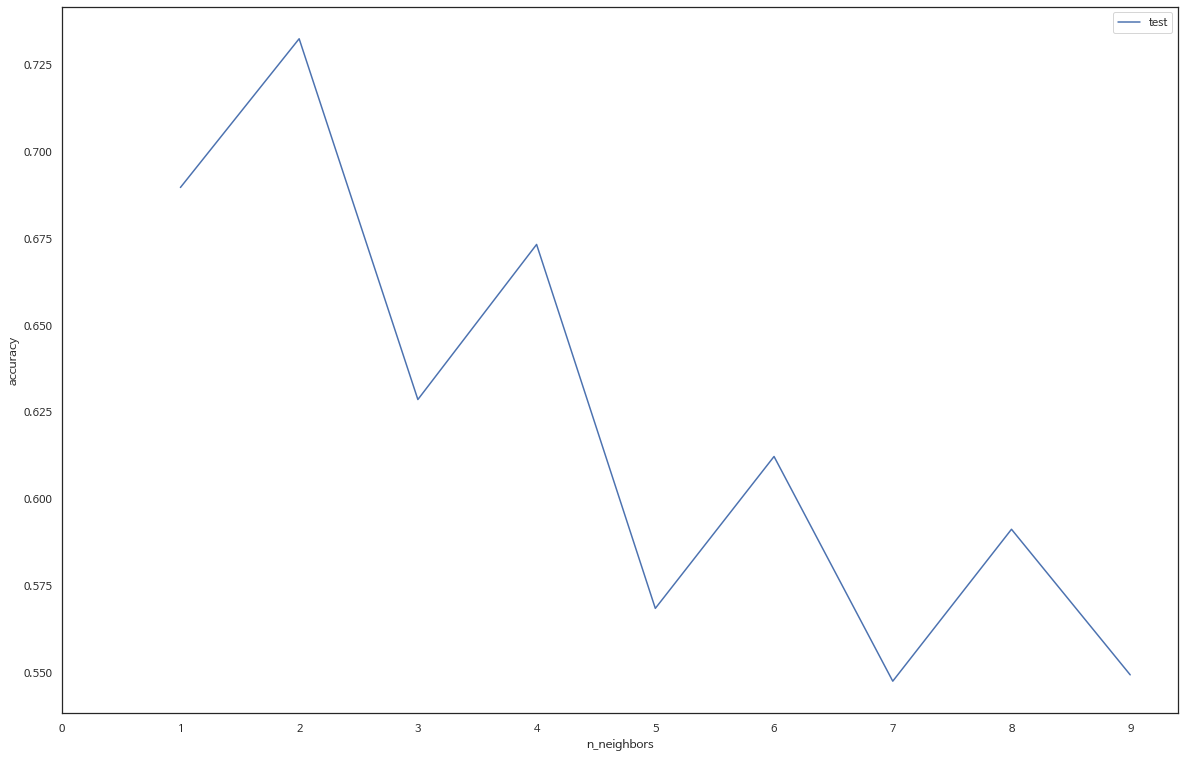

In [130]:
import numpy as np
import matplotlib.pyplot as plt

#k별로 정확도 비교
plt.figure()
plt.plot(range(1,10),test_acc,label='test')
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.xticks(np.arange(0,10,step=1))
plt.legend()
plt.show()

In [124]:
#knn 학습, k=2 지정
clf=KNeighborsClassifier(2)
clf.fit(x_train3,y_train)

KNeighborsClassifier(n_neighbors=2)

In [125]:
#예측
y_pred=clf.predict(x_test3)

In [126]:
#성능 확인
cmat=confusion_matrix(y_test,y_pred)
print(cmat)

[[775 165]
 [129  29]]


In [127]:
#accuracy
acc=accuracy_score(y_test,y_pred) 

In [128]:
#f1-score
f1 = f1_score(y_test, y_pred, average='weighted') 

In [129]:
#accuracy, f1-score 출력
print(f"f1:{f1:4f} accuracy:{acc:.4f}")

f1:0.743319 accuracy:0.7322


# 랜덤포레스트

In [132]:
from sklearn.ensemble import RandomForestClassifier
#파라미터 지정
rf_clf = RandomForestClassifier(n_estimators = 100,
                               max_depth = 15,
                                n_jobs = -1,
                                 verbose = 1,
                               random_state = 101)
#랜덤포레스트 학습
rf_clf.fit(x_train3, y_train)
pred = rf_clf.predict(x_test3)

#정확도, f1-score 확인
accuracy = accuracy_score(y_test, pred) 
f1 = f1_score(y_test,pred,average='weighted') 

print(f"f1:{f1:4f} accuracy:{accuracy:.4f}")

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.3s


f1:0.734300 accuracy:0.7086


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished


In [133]:
#성능확인
cmat = confusion_matrix(y_test,pred)
print(cmat)

[[733 207]
 [113  45]]


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#gridsearchcv를 활용한 교차검증 및 최적의 파라미터 찾기
params = {'n_estimators' : [100, 200],
          'max_depth' : [6, 8, 10, 12],
         'min_samples_leaf' : [8, 12, 18],
         'min_samples_split' : [8, 16, 20]}

rf_clf4 = RandomForestClassifier(random_state = 103,
                                 n_jobs = -1,
                                 verbose = 1)
grid_cv = GridSearchCV(rf_clf4,
                       param_grid = params,
                       n_jobs = -1,
                       verbose = 1,
                       cv=3)
grid_cv.fit(x_train3, y_train)

grid_cv2 = GridSearchCV(rf_clf4,
                       param_grid = params,
                       n_jobs = -1,
                       verbose = 1,
                       cv=3,
                       scoring = 'f1')
grid_cv2.fit(x_train3, y_train)
#f1스코어 모델 기준 예측값
pred = grid_cv2.predict(x_test3)

print('최적 하이퍼 마라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))
print('최적 하이퍼 마라미터: ', grid_cv2.best_params_)
print('최고 f1-score: {:.4f}'.format(grid_cv2.best_score_))

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.2s finished


Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 200 out of 200 | elapsed:    0.1s finished


최적 하이퍼 마라미터:  {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 200}
최고 예측 정확도: 0.7507
최적 하이퍼 마라미터:  {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 200}
최고 f1-score: 0.7533


In [ ]:
#gridcv 성능확인
cmat=confusion_matrix(y_test,pred)
print(cmat)

[[679 261]
 [104  54]]


# boosting - xgboost

In [134]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score,accuracy_score

#검증 데이터 넣어주어서 교차검증 해보도록하기
evals = [(x_test3, y_test)]
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1,
                           max_depth=3)

#eval_metrix 넣어주면서 검증 데이터로 loss 측정할 때 사용할 metric 지정
xgb_wrapper.fit(x_train3, y_train, early_stopping_rounds=200,
               eval_set=evals, eval_metric='logloss')

#예측
preds = xgb_wrapper.predict(x_test3)
preds_proba = xgb_wrapper.predict_proba(x_test3)[:, 1]
print(preds_proba[:10])

#정확도, f1-score 확인
accuracy = accuracy_score(y_test,preds)
f1 = f1_score(y_test,preds,average='weighted')

print(f"f1:{f1:4f} accuracy:{accuracy:.4f}")

[0]	validation_0-logloss:0.689397
Will train until validation_0-logloss hasn't improved in 200 rounds.
[1]	validation_0-logloss:0.686117
[2]	validation_0-logloss:0.683803
[3]	validation_0-logloss:0.682618
[4]	validation_0-logloss:0.680909
[5]	validation_0-logloss:0.679953
[6]	validation_0-logloss:0.677795
[7]	validation_0-logloss:0.677
[8]	validation_0-logloss:0.675231
[9]	validation_0-logloss:0.67553
[10]	validation_0-logloss:0.673241
[11]	validation_0-logloss:0.671689
[12]	validation_0-logloss:0.669582
[13]	validation_0-logloss:0.668918
[14]	validation_0-logloss:0.668484
[15]	validation_0-logloss:0.668106
[16]	validation_0-logloss:0.66779
[17]	validation_0-logloss:0.667248
[18]	validation_0-logloss:0.667425
[19]	validation_0-logloss:0.665758
[20]	validation_0-logloss:0.665221
[21]	validation_0-logloss:0.664911
[22]	validation_0-logloss:0.664719
[23]	validation_0-logloss:0.66302
[24]	validation_0-logloss:0.663029
[25]	validation_0-logloss:0.662631
[26]	validation_0-logloss:0.66231
[27

In [135]:
#성능확인
cmat = confusion_matrix(y_test,pred)
print(cmat)

[[733 207]
 [113  45]]


In [136]:
#예측값
xgb_wrapper.predict(x_test3)

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
print("##########################################")

## GridSearchCV 이용해서 교차검증&최적의 파라미터 찾기
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [3,5,8,10,15] ,
    'n_estimators':[100,200],
    'learning_rate':[0.01,0.05, 0.1],
    'gamma': [0.5,1,2,3], 
    'colsample_bytree' : [0.8,0.9],
    'random_state':[99]
}

grid_cv = GridSearchCV(xgb_wrapper, param_grid=params,
                      n_jobs=-1, cv=3, verbose=1)
grid_cv.fit(x_train3, y_train)

grid_cv2 = GridSearchCV(xgb_wrapper, param_grid=params,
                      n_jobs=-1, cv=3, verbose=1, scoring='f1')
grid_cv2.fit(x_train3, y_train)

#f1스코어기준 모델의 예측값
pred2 = grid_cv2.predict(x_test3)

print("최적의 파라미터:", grid_cv.best_params_)
print("최고의 정확도 :", grid_cv.best_score_)
print("최적의 파라미터:", grid_cv2.best_params_)
print("최고의 f1socre :", grid_cv2.best_score_)

##########################################
Fitting 3 folds for each of 240 candidates, totalling 720 fits
Fitting 3 folds for each of 240 candidates, totalling 720 fits
최적의 파라미터: {'colsample_bytree': 0.9, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 200, 'random_state': 99}
최고의 정확도 : 0.8421296296296297
최적의 파라미터: {'colsample_bytree': 0.9, 'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 200, 'random_state': 99}
최고의 f1socre : 0.8313889405216032


In [ ]:
#성능확인
cmat = confusion_matrix(y_test,pred2)
print(cmat)

[[825 115]
 [126  32]]


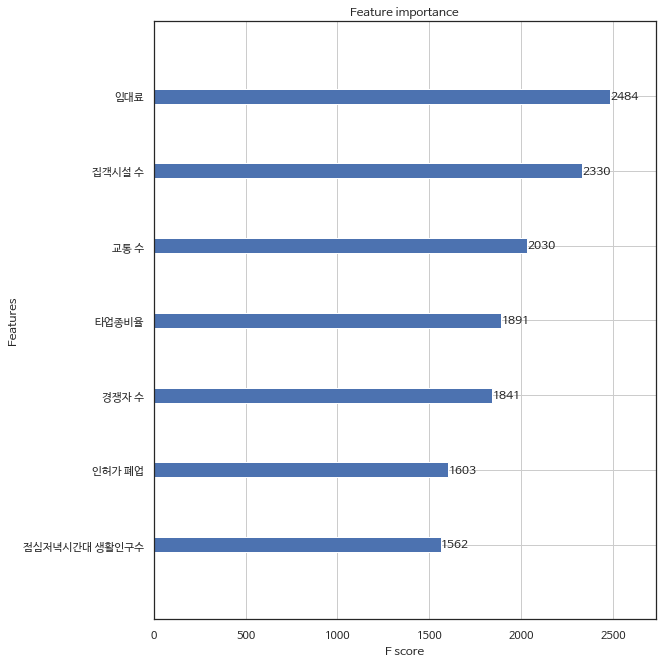

In [ ]:
# feature별 중요도 시각화하기
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(9,11))
plot_importance(grid_cv2.best_estimator_, ax)

<변수선택>


다중공선성 제외변수 : 타업종경쟁자, 인허가 영업+폐업, 인허가 영업, 총생활인구수, 소재지면적


로지스틱 제외변수 : 관광특구, 골목상권, 구분불가, 발달상권, 전통시장, 교육 수, 버퍼내폐업비율, 아파트 세대수


최종변수 : 경쟁자 수, 교통 수, 인허가 폐업, 임대료, 점심저녁시간대 생활인구수, 집객시설 수, 타업종비율

<모형>
로지스틱 : 
f1 : 0.790535, acc : 0.8543


KNN(k=2) : 
f1: 0.743319, acc : 0.7322


랜덤포레스트 : 
f1 : 0.734300,  acc : 0.7086


랜덤포레스트(grid) : 
f1 : 0.7538, acc : 0.7493


XGBoost : 
f1 : 0.764372, acc :0.7605


XGBoost(grid) : 
f1 : 0.8283028050016553, acc : 0.8405092592592592

<변수 중요도>

임대료 > 집객시설 수 > 교통 수 > 타업종비율 > 경쟁자 수 > 점심저녁시간대 생활인구수 > 인허가 폐업

<주요 변수와 생존의 관계>

임대료↑ 생존확률 1.093배↑
집객시설 수↑ 생존확률 1.1414배↑
교통 수↑ 생존확률 1.14배↑ 

<최종 모형> 

XGBoost

## 예측

In [ ]:
#예측할 데이터 불러오기-주피터용
forecast = pd.read_csv('영업분식예측.csv', encoding='cp949') #csv 불러오기

In [125]:
#예측할 데이터 불러오기-코랩용
#forecast = pd.read_csv('/content/drive/MyDrive/bigdata/영업분식예측.csv', encoding='cp949') #csv 불러오기

,경쟁자 수,교통 수,인허가 폐업,임대료,점심저녁시간대 생활인구수,집객시설 수,타업종비율
0,135,90,650,819,10936.29824,8,0.884615
1,139,93,671,834,10936.29824,8,0.885124
2,118,84,555,434,10936.29824,8,0.879959
3,162,85,684,763,23667.05304,7,0.885188
4,371,97,1245,1235,18597.21201,16,0.847136


In [ ]:
forecast.head()

In [126]:
#데이터에 상수항 추가
kf = sm.add_constant(forecast, has_constant="add")
kf

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,경쟁자 수,교통 수,인허가 폐업,임대료,점심저녁시간대 생활인구수,집객시설 수,타업종비율
0,1.0,135,90,650,819,10936.29824,8,0.884615
1,1.0,139,93,671,834,10936.29824,8,0.885124
2,1.0,118,84,555,434,10936.29824,8,0.879959
3,1.0,162,85,684,763,23667.05304,7,0.885188
4,1.0,371,97,1245,1235,18597.21201,16,0.847136
...,...,...,...,...,...,...,...,...
2261,1.0,221,71,1213,1914,44202.78123,17,0.902126
2262,1.0,184,67,911,2061,44202.78123,15,0.888552
2263,1.0,117,57,626,824,44202.78123,11,0.898701
2264,1.0,269,95,1322,917,55277.92730,16,0.891968


In [128]:
#from xgboost import XGBClassifier

In [129]:
xgb_wrapper1 = XGBClassifier(colsample_bytree = 0.9, 
                            gamma = 0.5, learning_rate = 0.1, max_depth = 15, n_estimators = 200, random_state = 99)
# eval_metric넣어주면서 검증 데이터로 loss 측정할 때 사용할 metric 지정
xgb_wrapper1.fit(x_train3, y_train,  eval_metric='logloss')

kfpred = xgb_wrapper1.predict(kf)
kfpred_proba = xgb_wrapper1.predict_proba(kf)[:, 1]
print(kfpred_proba[:10])

kfpred

[0.01244983 0.01244983 0.01244983 0.01244983 0.01317974 0.01317974
 0.01625814 0.01483607 0.01483607 0.01244983]


array([0, 0, 0, ..., 0, 0, 0])

In [130]:
live = pd.DataFrame(kfpred)

live.to_csv('/content/drive/MyDrive/bigdata/분식_생존여부.csv',index=False,encoding='cp949') 

In [131]:
result = pd.read_csv('/content/drive/MyDrive/bigdata/분식_생존여부.csv')
print(result)

      0
0     0
1     0
2     0
3     0
4     0
...  ..
2261  0
2262  0
2263  0
2264  0
2265  0

[2266 rows x 1 columns]


In [132]:
live2 = pd.DataFrame(kfpred_proba)

In [136]:
live2.to_csv('/content/drive/MyDrive/bigdata/분식_생존확률.csv',index=False,encoding='cp949') 

In [137]:
result1 = pd.read_csv('/content/drive/MyDrive/bigdata/분식_생존확률.csv')
print(result1)

             0
0     0.012450
1     0.012450
2     0.012450
3     0.012450
4     0.013180
...        ...
2261  0.014836
2262  0.014836
2263  0.014836
2264  0.014836
2265  0.014836

[2266 rows x 1 columns]
